# TON IoT multiclass detection using NetTiSA flows

In [1]:
import pandas as pd
import numpy as np
import json
import collections

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import lightgbm as lgb
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss


In [2]:
df = pd.read_csv("../final_datasets/ton_iot_mutliclass.csv")

In [3]:
df

,Unnamed: 0,SRC_IP,DST_IP,SRC_PORT,DST_PORT,TIME_FIRST,TIME_LAST,LABEL,PACKETS,PACKETS_REV,...,ROOT_MEAN_SQUARE,KURTOSIS,TIME_DISTRIBUTION,MEAN_RELATIVE_TIME,DURATION,MEAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,SWITCHING_METRIC,DIRECTIONS
0,0,192.168.1.133,224.0.0.251,5353,5353,1.554220e+09,1.554221e+09,clear,10,0,...,139.625213,0.874133,0.267197,12.751683,47.723840,5.302649,0.105342,26.960027,1.111111,1.0
1,1,fe80::1087:c341:7263:ead3,ff02::fb,5353,5353,1.554220e+09,1.554221e+09,clear,11,0,...,138.441980,0.902084,0.262991,12.550874,47.723620,4.772362,0.104397,26.960008,1.000000,1.0
2,2,192.168.1.152,192.168.1.192.,1880,40571,1.554220e+09,1.554221e+09,clear,2534,0,...,806.747481,2.775578,0.498117,149.388050,299.905341,0.118399,0.000009,0.869108,1.950257,1.0
3,3,192.168.1.152,192.168.1.190.,1880,43539,1.554220e+09,1.554221e+09,clear,2405,0,...,833.488650,3.295854,0.499061,149.670896,299.905281,0.124753,0.000013,0.869398,1.982529,1.0
4,4,192.168.1.190,192.168.1.152.,43539,1880,1.554220e+09,1.554221e+09,clear,2396,0,...,60.000000,0.000000,0.497263,149.131741,299.905242,0.125221,0.000033,0.869425,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3467409,3467409,192.168.1.195,52.147.9.175.,51670,443,1.556365e+09,1.556365e+09,xss,11,0,...,493.208789,4.800728,0.549271,0.124318,0.226333,0.022633,0.000118,0.145608,1.400000,1.0
3467410,3467410,192.168.1.195,52.147.9.175.,51778,443,1.556365e+09,1.556365e+09,xss,10,0,...,518.255728,4.991372,0.555707,0.044454,0.079996,0.008888,0.000783,0.017896,1.555556,1.0
3467411,3467411,52.147.9.175,192.168.1.195.,443,51670,1.556365e+09,1.556365e+09,xss,10,0,...,1074.271893,0.912363,0.417557,0.091755,0.219742,0.024416,0.000005,0.157580,1.333333,1.0
3467412,3467412,52.147.9.175,192.168.1.195.,443,51778,1.556365e+09,1.556365e+09,xss,10,0,...,1066.161620,0.875264,0.418338,0.032386,0.077416,0.008602,0.000004,0.025017,1.333333,1.0


In [10]:
default_faetures = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
]

features = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
    "MEAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "KURTOSIS",
    "TIME_DISTRIBUTION",
    "MEAN_RELATIVE_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
]

In [11]:
import sklearn
pd.set_option('display.max_columns', None)

df = df[["LABEL"] + features].copy()

df['LABEL'] = df.LABEL.astype('category')
df["LABEL_code"] = df["LABEL"].cat.codes


for F in features:
    df.replace([np.inf], 0, inplace=True)
    df.replace([-np.inf], 0, inplace=True)
    df.loc[df[F].isnull(), F] = 0

In [12]:
df

,LABEL,PACKETS,PACKETS_REV,BYTES,BYTES_REV,MEAN,STDEV,VAR,BURSTINESS,MIN,MAX,MIN_MINUS_MAX,COEFFICIENT_OF_VARIATION,AVERAGE_DISPERSION,PERCENT_DEVIATION,ROOT_MEAN_SQUARE,KURTOSIS,TIME_DISTRIBUTION,MEAN_SCALED_TIME,DURATION,MEAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,SWITCHING_METRIC,DIRECTIONS,LABEL_code
0,clear,10,0,792,0,139,11.445523,131,-0.847845,126,150,24,8.234189,10,7.194245,139.625213,0.874133,0.267197,12.751683,47.723840,5.302649,0.105342,26.960027,1.111111,1.0,1
1,clear,11,0,858,0,138,11.575837,134,-0.845218,126,150,24,8.388288,10,7.246377,138.441980,0.902084,0.262991,12.550874,47.723620,4.772362,0.104397,26.960008,1.000000,1.0,1
2,clear,2534,0,1536348,0,666,454.946151,206976,-0.188282,64,2673,2609,68.310233,382,57.357357,806.747481,2.775578,0.498117,149.388050,299.905341,0.118399,0.000009,0.869108,1.950257,1.0,1
3,clear,2405,0,1493560,0,681,480.631876,231007,-0.172488,64,2673,2609,70.577368,394,57.856094,833.488650,3.295854,0.499061,149.670896,299.905281,0.124753,0.000013,0.869398,1.982529,1.0,1
4,clear,2396,0,0,0,60,0.000000,0,-1.000000,60,60,0,0.000000,0,0.000000,60.000000,0.000000,0.497263,149.131741,299.905242,0.125221,0.000033,0.869425,0.000000,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3467409,xss,11,0,2356,0,274,429.984883,184887,0.221574,60,1425,1365,156.928790,294,107.299270,493.208789,4.800728,0.549271,0.124318,0.226333,0.022633,0.000118,0.145608,1.400000,1.0,8
3467410,xss,10,0,2280,0,288,454.171774,206272,0.223899,60,1492,1432,157.698533,300,104.166667,518.255728,4.991372,0.555707,0.044454,0.079996,0.008888,0.000783,0.017896,1.555556,1.0,8
3467411,xss,10,0,7763,0,836,710.760156,505180,-0.080969,60,1520,1460,85.019157,655,78.349282,1074.271893,0.912363,0.417557,0.091755,0.219742,0.024416,0.000005,0.157580,1.333333,1.0,8
3467412,xss,10,0,7600,0,820,718.254133,515889,-0.066144,60,1520,1460,87.591967,671,81.829268,1066.161620,0.875264,0.418338,0.032386,0.077416,0.008602,0.000004,0.025017,1.333333,1.0,8


In [13]:
df[["LABEL", "LABEL_code"]].drop_duplicates().sort_values("LABEL_code")

,LABEL,LABEL_code
10853,backdoor,0
0,clear,1
78648,dos,2
721672,injection,3
1128699,mitm,4
1133581,password,5
1609230,runsomware,6
1631832,scanning,7
1962456,xss,8


In [14]:
classifications_array = []
for index, row in df[["LABEL", "LABEL_code"]].drop_duplicates().sort_values("LABEL_code").iterrows():
    classifications_array.append(row[0])
classifications_array

['backdoor',
 'clear',
 'dos',
 'injection',
 'mitm',
 'password',
 'runsomware',
 'scanning',
 'xss']

In [15]:
df = df[["LABEL_code"] + features].copy()

In [16]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df)

In [17]:
df.shape

(3467414, 25)

In [18]:
df_validation = df.sample(n = 250000)
df_features =  df[~df.isin(df_validation)].dropna()

In [19]:
def get_confusion_matrix(y_test, y_pred):
    # Get and reshape confusion matrix data
    matrix = confusion_matrix(y_test, y_pred)
    percentage_matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    return matrix, percentage_matrix

def plot_confusion_matrix(matrix, percentage_matrix, model=""):
    # Build the plot
    fig, ax = plt.subplots(1, 2,figsize=(15,5))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[0])
    sns.heatmap(percentage_matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[1])
    # Add labels to the plot
    plt.tick_params(axis='both', which='minor', labelsize=5)
    # tick_marks = np.arange(len(classifications_array)) + 0.5
    # plt.xticks(tick_marks, classifications_array, rotation=85)
    # plt.yticks(tick_marks, classifications_array, rotation=0)
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')
    ax[0].set_title(f'Absolute Confusion Matrix for {model}')
    ax[1].set_xlabel('Predicted label')
    ax[1].set_ylabel('True label')
    ax[1].set_title(f'Relative Confusion Matrix for {model}')
    # pyplot.savefig("ddos_timeseries_plugin_classification.eps", format="eps")
    plt.show()

In [20]:
X = df_features[features]
y = df_features.LABEL_code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [21]:
y_train.value_counts()

8.0    977323
2.0    417814
5.0    309015
3.0    264396
7.0    214765
0.0     43981
6.0     14678
1.0      7037
4.0      3180
Name: LABEL_code, dtype: int64

In [22]:
y_test.value_counts()

8.0    418853
2.0    179064
5.0    132435
3.0    113313
7.0     92042
0.0     18849
6.0      6290
1.0      3016
4.0      1363
Name: LABEL_code, dtype: int64

In [23]:
df_validation["LABEL_code"].value_counts()

8.0    108782
2.0     46146
5.0     34199
3.0     29318
7.0     23817
0.0      4965
6.0      1634
1.0       800
4.0       339
Name: LABEL_code, dtype: int64

In [34]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_absolute_error

def tunne_together_XGBoost_classification(df_tunne, _features, verbose=True):
    X=df_tunne[_features]  # Features
    y=df_tunne['LABEL_code']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)
    
    def objective(space):
        clf = XGBClassifier(
                        n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                        reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                        colsample_bytree=int(space['colsample_bytree']), 
                        # subsample=int(space['subsample']),
                        # eta=space['eta'],
                            )

        evaluation = [( X_train, y_train), ( X_test, y_test)]

        clf.fit(X_train, y_train,
                eval_set=evaluation, eval_metric="auc",
                early_stopping_rounds=10,verbose=False)

        pred = clf.predict(X_test)
        # accuracy = mean_absolute_error(y_test, pred)
        # accuracy = accuracy_score(y_test, pred)
        accuracy = f1_score(y_test, pred,average='macro')
        if verbose is True:
            print ("SCORE:", accuracy, "  ", space)
        return {'loss': -accuracy, 'status': STATUS_OK }
    
    space={'max_depth': hp.quniform("max_depth", 5, 40, 5),
        'gamma': hp.uniform ('gamma', 1,4),
        'reg_alpha' : hp.quniform('reg_alpha', 0,90,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': hp.quniform('n_estimators', 50, 400, 50),
        # 'subsample': hp.quniform('subsample', 3, 20, 1),
        # 'eta': hp.quniform('eta', 0.005, 0.3, 0.005),
        'seed': 0
    }
    
    trials = Trials()
    
    best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
        
    print("The best hyperparameters are : ","\n")
    print(best_hyperparams)
    return best_hyperparams

In [35]:
df_to_tune = df_features.sample(n=200000)
best_hyperparams = tunne_together_XGBoost_classification(df_to_tune, features, verbose=False)

100%|██████████| 100/100 [1:37:57<00:00, 58.78s/trial, best loss: -0.785911960229298]
The best hyperparameters are :  

{'colsample_bytree': 0.5588926169356092, 'gamma': 1.0416378015552745, 'max_depth': 5.0, 'min_child_weight': 10.0, 'n_estimators': 400.0, 'reg_alpha': 0.0, 'reg_lambda': 0.14669188062027305}


In [36]:
def XGBoost_classification_tunned_old(best_hyperparams, X_train=None, X_test=None, y_train=None, y_test=None):
      if X_train is None:
            X=df_features[features]  # Features
            y=df_features['LABEL_code']  # Labels
            #Split on train and test
            X_train_a, X_test_a, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
            X_train = X_train_a[features]
            X_test = X_test_a[features] 
      
      model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
      )
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      
      print(classification_report(y_test, y_pred, target_names=classifications_array, digits=4))
      matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
      plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")
      return model

              precision    recall  f1-score   support

    backdoor     0.7230    0.8192    0.7681     18849
       clear     0.9236    0.8975    0.9104      3016
         dos     0.9663    0.9669    0.9666    179064
   injection     0.9563    0.9471    0.9517    113313
        mitm     0.5886    0.2414    0.3424      1363
    password     0.9528    0.9524    0.9526    132435
  runsomware     0.7462    0.5380    0.6252      6290
    scanning     0.9510    0.9115    0.9308     92042
         xss     0.9756    0.9872    0.9814    418853

    accuracy                         0.9592    965225
   macro avg     0.8648    0.8068    0.8255    965225
weighted avg     0.9590    0.9592    0.9588    965225



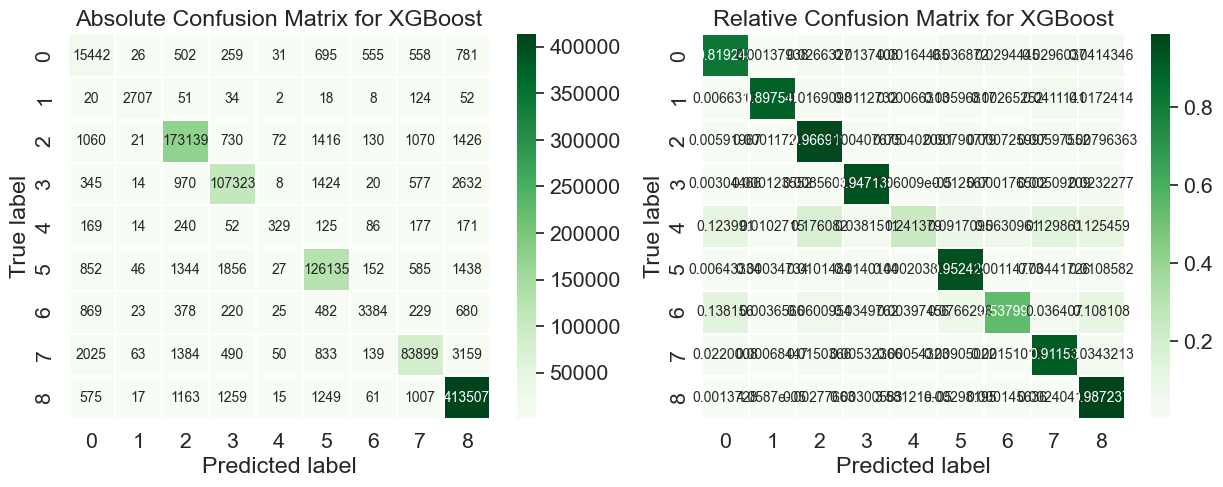

In [37]:
model = XGBoost_classification_tunned_old(best_hyperparams, X_train, X_test, y_train, y_test)

In [45]:

def while_XGBoost_classification_tunned_old(best_hyperparams, cycles=100):
    X=df_features[features]  # Features
    y=df_features['LABEL_code']  # Labels
    best = 0
    best_model = None
    report = None
    i = 0
    for i in range(cycles):
        tmp_f1 = 0
        tmp_str = ""
        #Split on train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y) # 70% training and 30% test
        # sm = SMOTE(random_state=100)
        # X_train, y_train = sm.fit_resample(X_train, y_train)
        # X_test, y_test = sm.fit_resample(X_test, y_test)
        
        model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
        )
        model.fit(X_train, y_train, ) # eval_set=evaluation, eval_metric=["auc","error","logloss"], verbose=False
        y_pred = model.predict(X_test)
        
        F1 = f1_score(y_test, y_pred, average='macro')
        if F1 > best:   
            best = F1
            best_model = model
            report = classification_report(y_test, y_pred, target_names=classifications_array, digits=4)
        
    print("")
    print(report)
    return best_model

In [53]:
best_hyperparams = {'colsample_bytree': 0.5588926169356092, 'gamma': 1.0416378015552745, 'max_depth': 30.0, 'min_child_weight': 10.0, 'n_estimators': 400.0, 'reg_alpha': 0.0, 'reg_lambda': 0.14669188062027305}
best_model = while_XGBoost_classification_tunned_old(best_hyperparams, cycles=1)


              precision    recall  f1-score   support

    backdoor     0.7449    0.7848    0.7643     18849
       clear     0.9354    0.8979    0.9163      3016
         dos     0.9655    0.9693    0.9674    179064
   injection     0.9571    0.9474    0.9523    113313
        mitm     0.5330    0.2847    0.3711      1363
    password     0.9537    0.9511    0.9524    132435
  runsomware     0.7132    0.5946    0.6485      6290
    scanning     0.9456    0.9196    0.9324     92042
         xss     0.9773    0.9869    0.9821    418853

    accuracy                         0.9599    965225
   macro avg     0.8584    0.8152    0.8319    965225
weighted avg     0.9595    0.9599    0.9596    965225



              precision    recall  f1-score   support

    backdoor     0.7500    0.7911    0.7700      4965
       clear     0.9338    0.8988    0.9159       800
         dos     0.9656    0.9694    0.9675     46146
   injection     0.9591    0.9480    0.9535     29318
        mitm     0.4872    0.2242    0.3071       339
    password     0.9527    0.9524    0.9526     34199
  runsomware     0.7038    0.5832    0.6379      1634
    scanning     0.9455    0.9181    0.9316     23817
         xss     0.9774    0.9871    0.9823    108782

    accuracy                         0.9601    250000
   macro avg     0.8528    0.8080    0.8243    250000
weighted avg     0.9596    0.9601    0.9597    250000



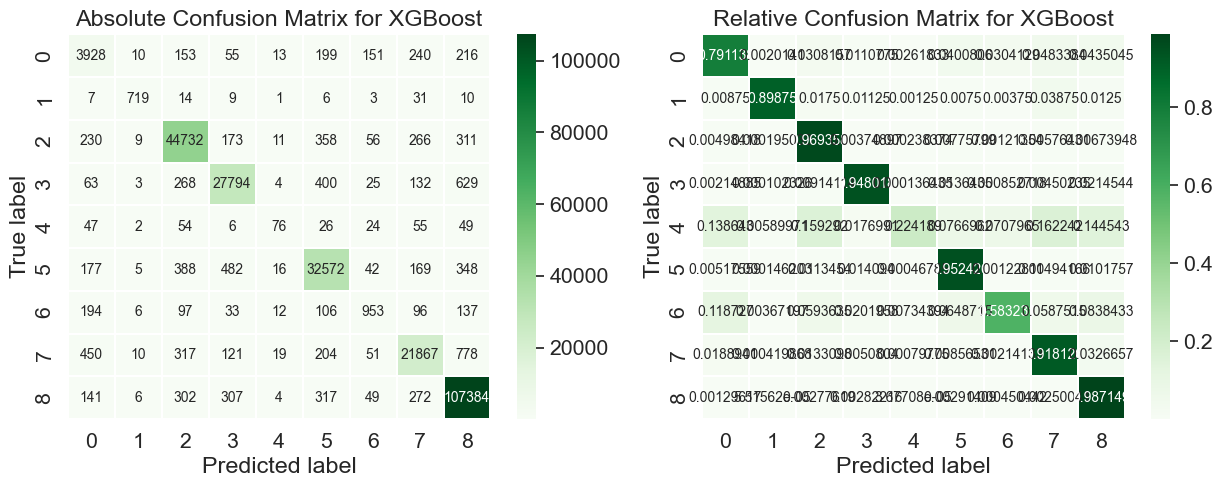

In [54]:
X_validation=df_validation[features]  # Features
y_validation=df_validation['LABEL_code']  # Labels
    

y_pred = best_model.predict(X_validation)

print(classification_report(y_validation, y_pred, target_names=classifications_array, digits=4))

matrix, percentage_matrix = get_confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")

# Feature importance

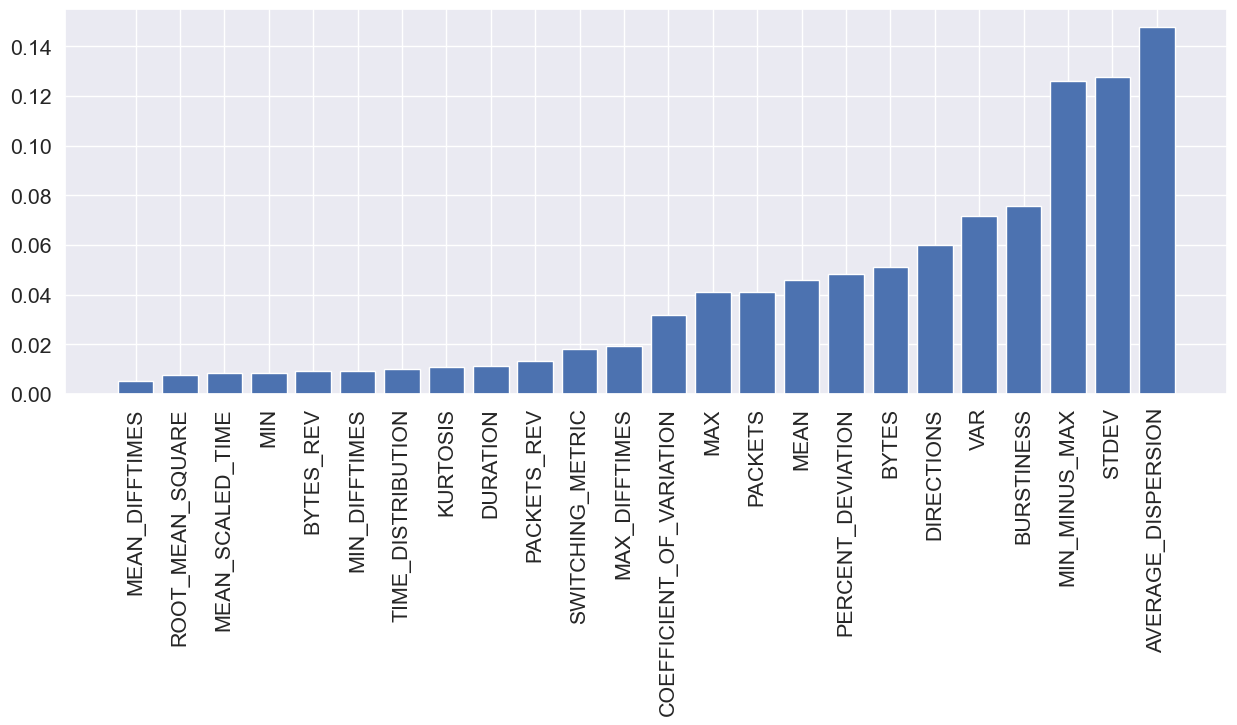

In [55]:
feat_importances = pd.Series(best_model.feature_importances_, index = X_validation.columns).sort_values(ascending = True)
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(feat_importances.keys(), feat_importances.values)
plt.xticks(rotation = 90)
plt.show()

In [56]:
feat_importances.to_dict()

{'MEAN_DIFFTIMES': 0.005057868547737598,
 'ROOT_MEAN_SQUARE': 0.007836512289941311,
 'MEAN_SCALED_TIME': 0.008594121783971786,
 'MIN': 0.008654087781906128,
 'BYTES_REV': 0.009112996980547905,
 'MIN_DIFFTIMES': 0.009413442574441433,
 'TIME_DISTRIBUTION': 0.010176694951951504,
 'KURTOSIS': 0.010944140143692493,
 'DURATION': 0.01110556349158287,
 'PACKETS_REV': 0.013138853944838047,
 'SWITCHING_METRIC': 0.018284734338521957,
 'MAX_DIFFTIMES': 0.019388539716601372,
 'COEFFICIENT_OF_VARIATION': 0.0319807231426239,
 'MAX': 0.041039928793907166,
 'PACKETS': 0.041205521672964096,
 'MEAN': 0.04598608240485191,
 'PERCENT_DEVIATION': 0.04845009371638298,
 'BYTES': 0.05096301808953285,
 'DIRECTIONS': 0.059967733919620514,
 'VAR': 0.07173356413841248,
 'BURSTINESS': 0.07569655030965805,
 'MIN_MINUS_MAX': 0.12615689635276794,
 'STDEV': 0.12749361991882324,
 'AVERAGE_DISPERSION': 0.14761869609355927}